In [25]:

import requests
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [7]:
#Obtener los datos

def obtener_datos_historicos(criptomoneda, vs_moneda, dias):
    url = f'https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart'
    parametros = {
        'vs_currency': vs_moneda,
        'days': dias
    }
    respuesta = requests.get(url, params=parametros)
    datos = respuesta.json()
    precios = datos['prices']
    df = pd.DataFrame(precios, columns=['timestamp', 'precio'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df




In [11]:
#Usar la funcion creada
df = obtener_datos_historicos('bitcoin','usd',30)
display(df.head())

,precio
timestamp,
2025-07-27 20:07:47.487,119008.534706
2025-07-27 21:10:45.640,118878.734087
2025-07-27 22:09:27.613,119470.876309
2025-07-27 23:07:36.535,119516.242626
2025-07-28 00:09:25.908,119434.444445


In [22]:
#Vamos hacer un dataframe con velas japonesas
#Obtener precio de cierre y apertrua
df_candlestick = df['precio'].resample('D').ohlc()
display(df_candlestick.head())

,open,high,low,close
timestamp,,,,
2025-07-27,119008.534706,119516.242626,118878.734087,119516.242626
2025-07-28,119434.444445,119568.350544,117666.680312,117911.757230
2025-07-29,118003.302016,118932.517501,117342.645419,117803.586167
2025-07-30,117830.596031,118643.994412,116726.914121,117460.730223
2025-07-31,117827.804228,118669.277782,116112.829118,116112.829118


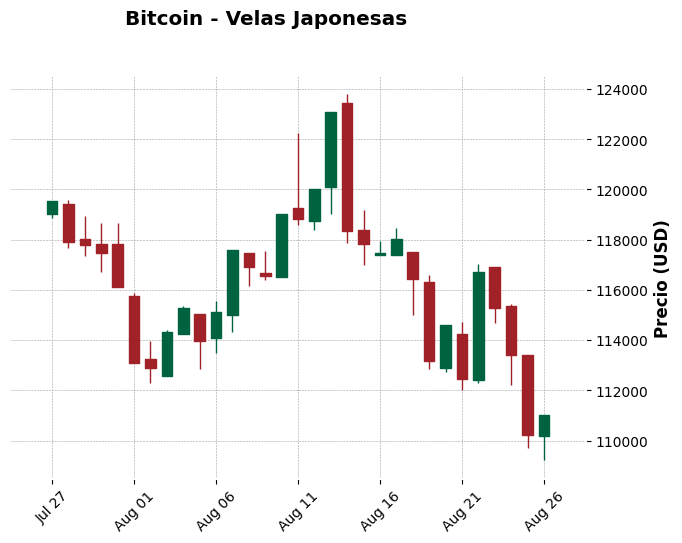

In [23]:
#Grafico de velas japonesas
mpf.plot(df_candlestick, type='candle',style='charles',title='Bitcoin - Velas Japonesas', ylabel = 'Precio (USD)')

In [24]:
#Analisis exploratorio
df.describe()

,precio
count,722.000000
mean,116182.075436
std,2722.027620
min,109214.153450
25%,114087.256330
50%,116443.157973
75%,118145.245877
max,123782.080087


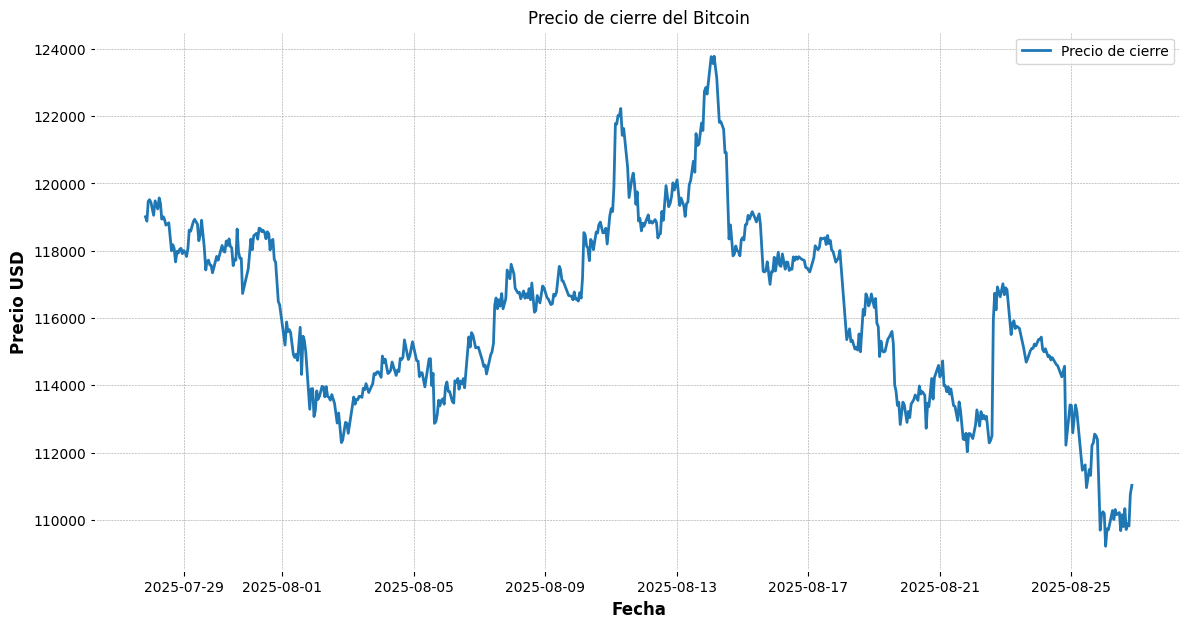

In [26]:
#Tendencia del precio de cierre
plt.figure(figsize = (14 , 7))
plt.plot(df.index, df['precio'], label = 'Precio de cierre')
plt.title('Precio de cierre del Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

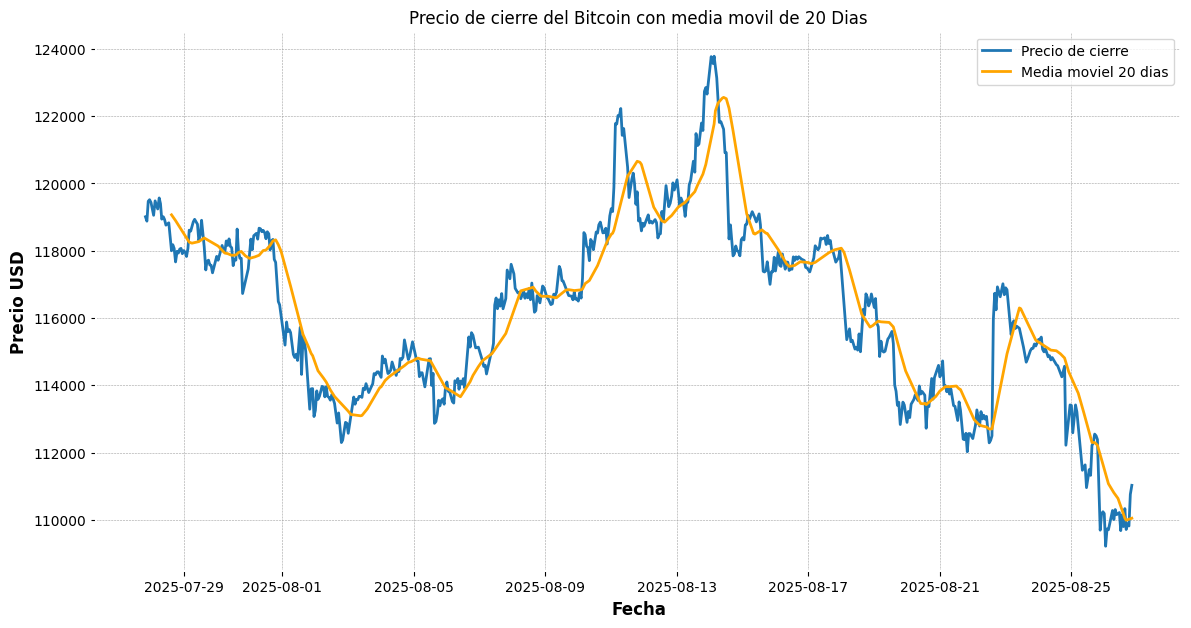

In [32]:
#Calcular indicadores termicos
df['Media_movil_20']= df['precio'].rolling(window=20).mean()

#Graficas y visualizar
plt.figure(figsize = (14 , 7))
plt.plot(df.index, df['precio'], label = 'Precio de cierre')
plt.plot(df.index, df['Media_movil_20'], label = 'Media moviel 20 dias', color = 'orange')
plt.title('Precio de cierre del Bitcoin con media movil de 20 Dias')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

